In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [45]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:\\Users\\YashnaBehera\\Downloads\\insurance.csv')
insured=df.copy()
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [3]:
# inspect data, print top 5 
insured.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insured['sex'] = insured['sex'].astype('category')#nominal
insured['smoker'] = insured['smoker'].astype('category')#nominal
insured['region'] = insured['region'].astype('category')#nominal

In [7]:
# seggregating variables into groups
categoricals_details = ['sex','smoker','region']
numericals_details = ['bmi','children','charges']

### Q1. Perform Univariate Analysis on this dataset ?

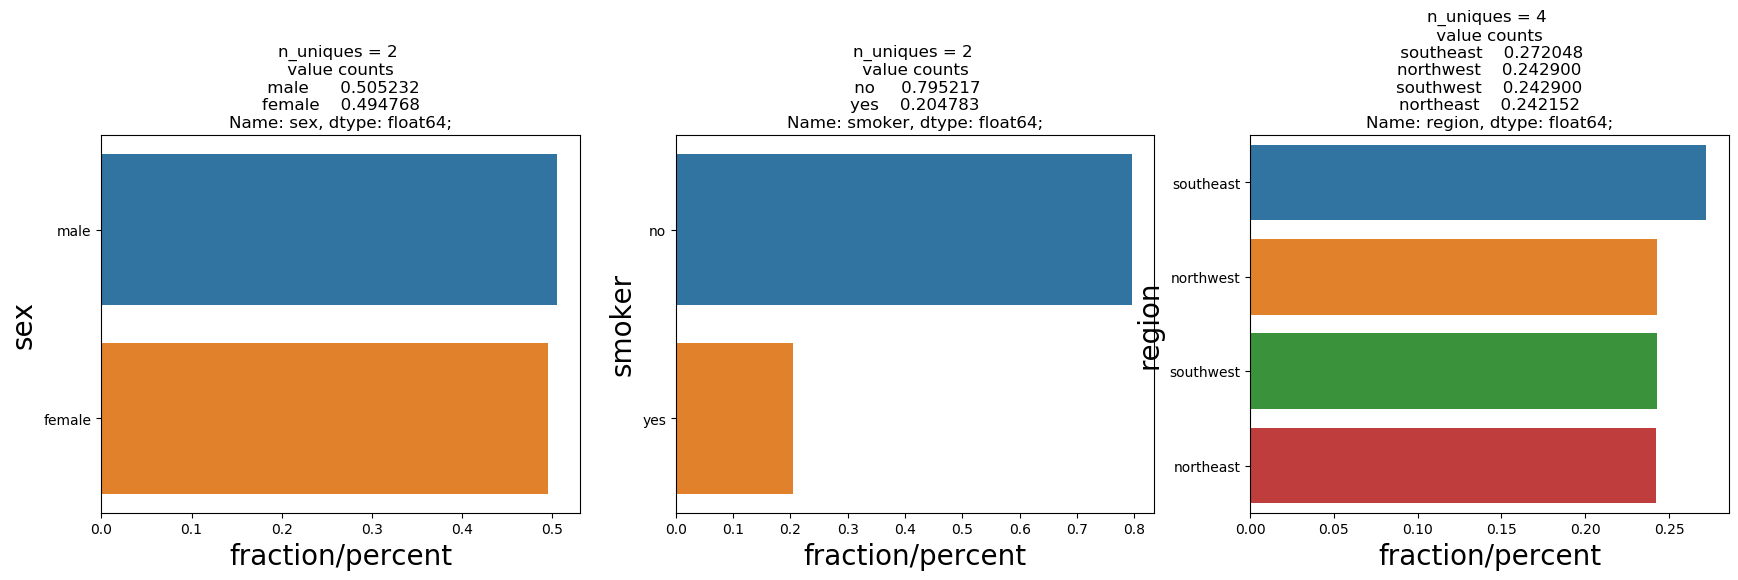

In [42]:
def UVA_category(data, var_group):
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    
UVA_category(insured, categoricals_details)

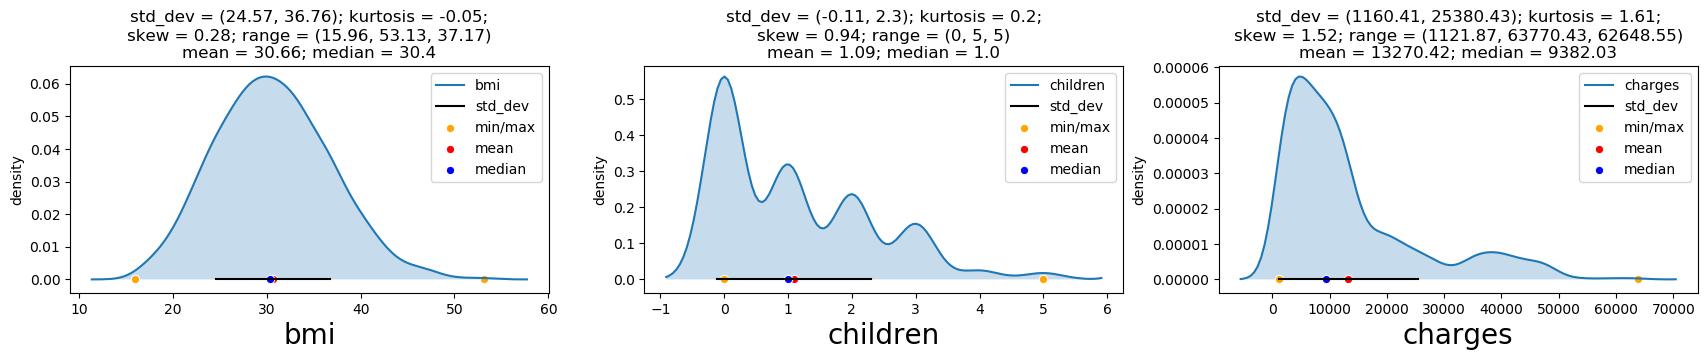

In [20]:
def UVA_numeric(data, var_group):

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
UVA_numeric(insured, numericals_details)

### Q2. Plot bivariate Boxplot for every possible combination of features ?

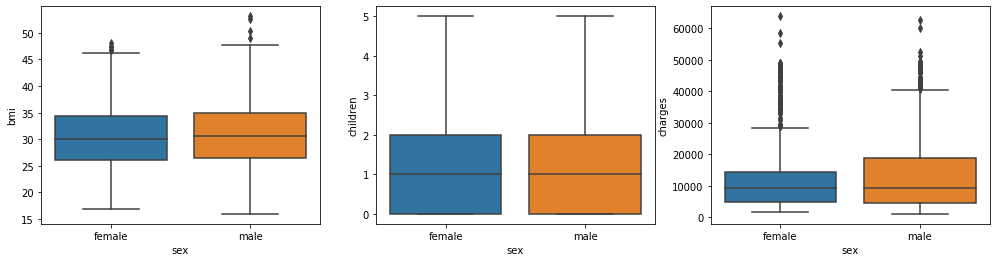

In [41]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='sex',
    y='bmi',
    data=insured)

plt.subplot(1, 3, 2)
sns.boxplot( x='sex',
    y='children',
    data=insured)

plt.subplot(1, 3, 3)
sns.boxplot( x='sex',
    y='charges',
    data=insured)

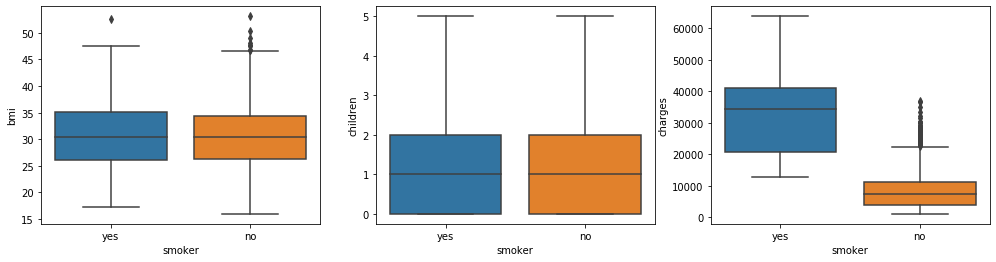

In [43]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='smoker',
    y='bmi',
    data=insured)

plt.subplot(1, 3, 2)
sns.boxplot( x='smoker',
    y='children',
    data=insured)

plt.subplot(1, 3, 3)
sns.boxplot( x='smoker',
    y='charges',
    data=insured)

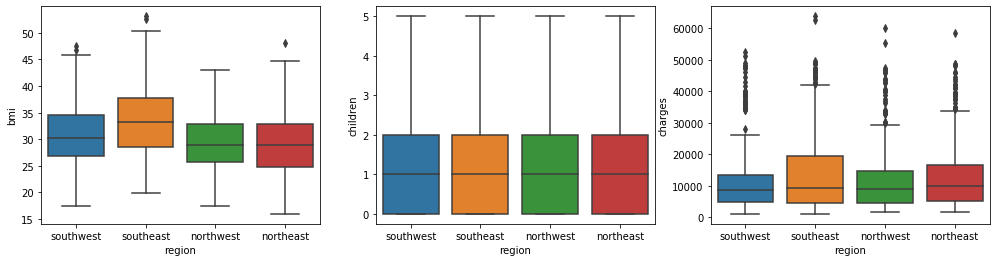

In [44]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='region',
    y='bmi',
    data=insured)

plt.subplot(1, 3, 2)
sns.boxplot( x='region',
    y='children',
    data=insured)

plt.subplot(1, 3, 3)
sns.boxplot( x='region',
    y='charges',
    data=insured)

### Q3. Plot bivariate paired plot and differentiate the observed patterns between smoking and non smoking group?

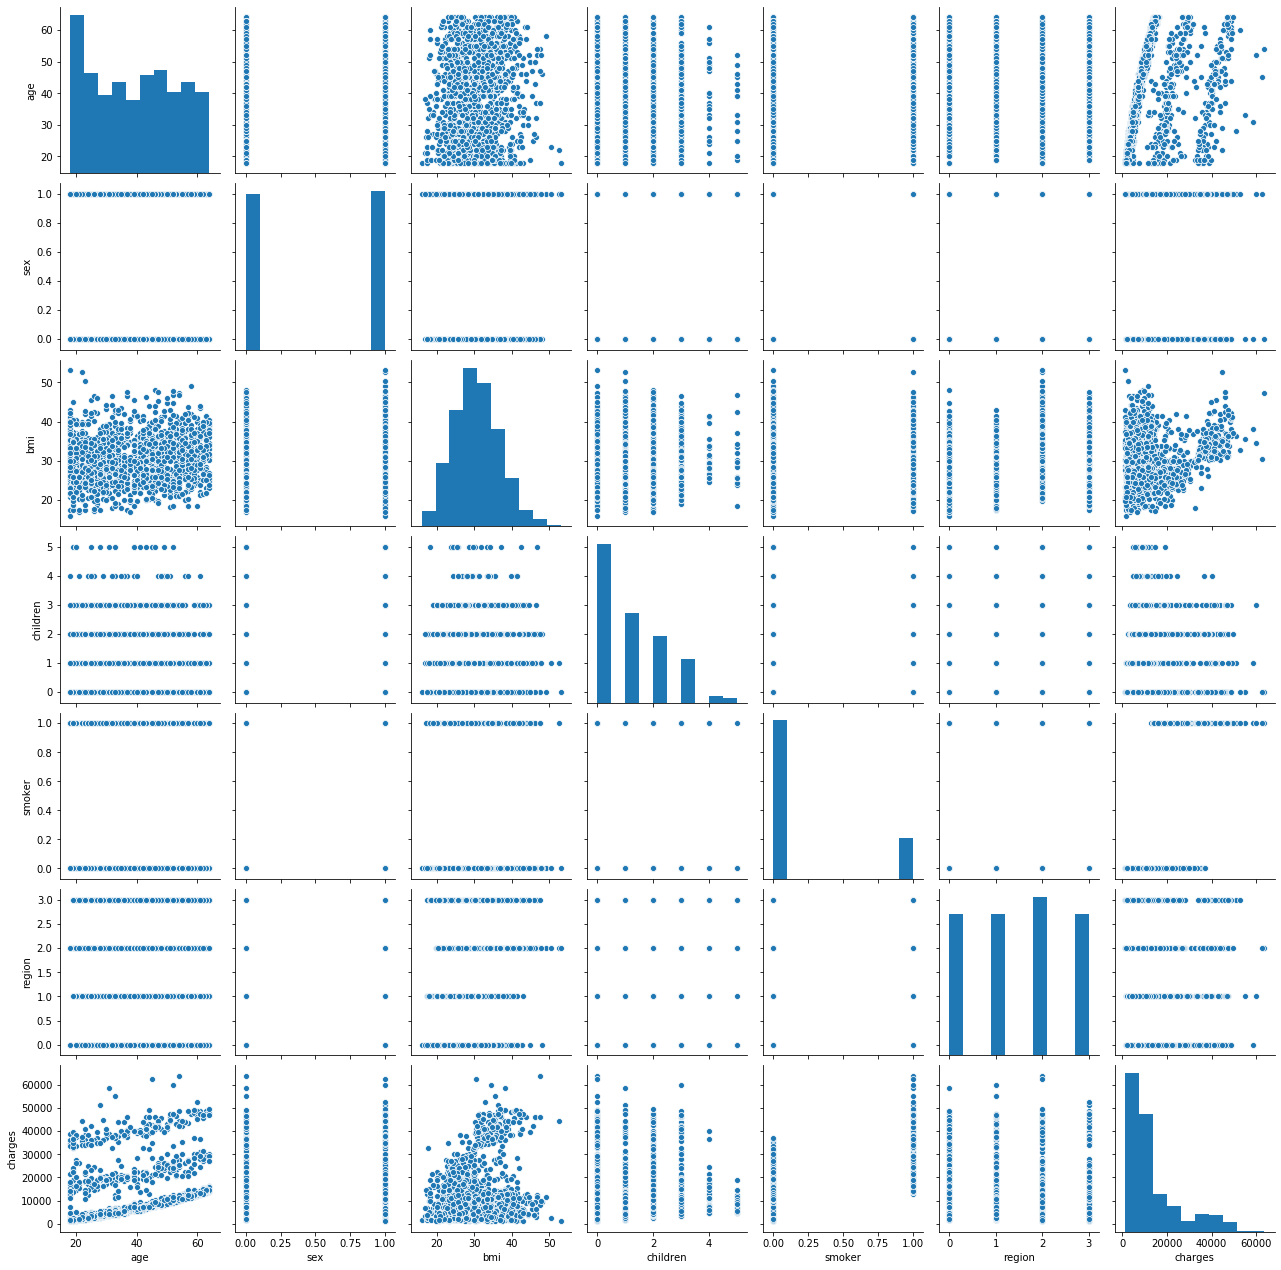

In [46]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df_encoded = copy.deepcopy(insured)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()

* The correlation of 'charges' is with 'smoker'
* Looks like smokers claimed more money than non-smokers
* There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

### Q4. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

In [57]:
# T-test to check dependency of smoking on charges
Ho = "mean charges of smokers = mean charges of non smokers"   # Stating the Null Hypothesis
Ha = "mean charges of smokers != mean charges of non smokers"   # Stating the Alternate Hypothesis

x = np.array(insured[insured.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insured[insured.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test
print(t, p_value)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round()}) > 0.05')

46.664921172723716 8.271435842177219e-283
mean charges of smokers != mean charges of non smokers as the p_value (0.0) < 0.05


### Q5: Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.?

In [50]:
# T-test to check dependency of bmi on gender
Ho = "mean female BMI = mean male BMI"   # Stating the Null Hypothesis
Ha = "mean female BMI != mean male BMI"   # Stating the Alternate Hypothesis

x = np.array(insured[insured.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insured[insured.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(t, p_value)

if p_value < 0.05:  # Setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

1.696752635752224 0.08997637178984932
mean female BMI = mean male BMI as the p_value (0.09) > 0.05
